# Client churn

Customers are starting to leave "Beta Bank." Every month. It's not a lot, but it's noticeable. Bank marketers have calculated that retaining existing customers is cheaper than acquiring new ones.

The task is to predict whether a customer will leave the bank in the near future. You have been provided with historical data on customer behavior and contract terminations with the bank.

Build a model with a significantly high F1 score.  Evaluate the F1 score on the test dataset independently.

Additionally, measure the AUC-ROC and compare its value with the F1 score.

Data source: https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling


<h1> Table of Contents <span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Data preparation</a></span></li><li><span><a href="#Исследование-задачи" data-toc-modified-id="Исследование-задачи-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Research of the task</a></span><ul class="toc-item"><li><span><a href="#DecisionTreeClassifier" data-toc-modified-id="DecisionTreeClassifier-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>DecisionTreeClassifier</a></span></li><li><span><a href="#RandomForestClassifier" data-toc-modified-id="RandomForestClassifier-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>RandomForestClassifier</a></span></li><li><span><a href="#LogisticRegression" data-toc-modified-id="LogisticRegression-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>LogisticRegression</a></span></li></ul></li><li><span><a href="#Борьба-с-дисбалансом" data-toc-modified-id="Борьба-с-дисбалансом-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Tactics To Combat Imbalanced Training Data</a></span><ul class="toc-item"><li><span><a href="#DecisionTreeClassifier-увеличение-выборки" data-toc-modified-id="DecisionTreeClassifier-увеличение-выборки-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>DecisionTreeClassifier Upsampling</a></span></li><li><span><a href="#DecisionTreeClassifier-уменьшение-выборки" data-toc-modified-id="DecisionTreeClassifier-уменьшение-выборки-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>DecisionTreeClassifier Downsampling</a></span></li><li><span><a href="#RandomForestClassifier-увеличение-выборки" data-toc-modified-id="RandomForestClassifier-увеличение-выборки-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>RandomForestClassifier Upsampling</a></span></li><li><span><a href="#RandomForestClassifier-уменьшение-выборки" data-toc-modified-id="RandomForestClassifier-уменьшение-выборки-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>RandomForestClassifier Downsampling</a></span></li><li><span><a href="#LogisticRegression-увеличение-выборки" data-toc-modified-id="LogisticRegression-увеличение-выборки-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>LogisticRegression Upsampling</a></span></li><li><span><a href="#LogisticRegression-уменьшение-выборки" data-toc-modified-id="LogisticRegression-уменьшение-выборки-3.6"><span class="toc-item-num">3.6&nbsp;&nbsp;</span>LogisticRegression Downsampling</a></span></li></ul></li><li><span><a href="#Тестирование-модели" data-toc-modified-id="Тестирование-модели-4"><span class="toc-item-num">4&nbsp;&nbsp;</span> Model testing</a></span><ul class="toc-item"><li><span><a href="#ROC-кривая" data-toc-modified-id="ROC-кривая-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>ROC curve

## Data preparation

Prepare the libraries, data, and features.

In [283]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.utils import shuffle
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
import os



In [284]:
pth1 = '/datasets/Churn.csv'
pth2 = 'C:/Users/n.kirpichnikov/Desktop/Оля Учеба/Проекты/Отток клиентов/Churn.csv'

if os.path.exists(pth1):
    data = pd.read_csv(pth1)
elif os.path.exists(pth2):
    data = pd.read_csv(pth2)
else:
    print('Something is wrong')

In [285]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


In [286]:
display(data.head())

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0


In [287]:
display(data.tail())

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,9996,15606229,Obijiaku,771,France,Male,39,5.0,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10.0,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7.0,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3.0,75075.31,2,1,0,92888.52,1
9999,10000,15628319,Walker,792,France,Female,28,NaN,130142.79,1,1,0,38190.78,0


In [288]:
#Do we have any missing values?
data.isnull().sum()

RowNumber            0
CustomerId           0
Surname              0
CreditScore          0
Geography            0
Gender               0
Age                  0
Tenure             909
Balance              0
NumOfProducts        0
HasCrCard            0
IsActiveMember       0
EstimatedSalary      0
Exited               0
dtype: int64

In [289]:
data['Tenure'].describe()

count    9091.000000
mean        4.997690
std         2.894723
min         0.000000
25%         2.000000
50%         5.000000
75%         7.000000
max        10.000000
Name: Tenure, dtype: float64

<AxesSubplot:>

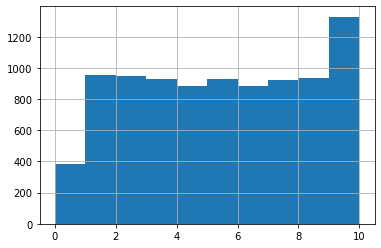

In [290]:
data['Tenure'].hist()

In [291]:
data = data.fillna(data['Tenure'].median())

Tenure represents the number of years a person has been a customer of the bank. The maximum tenure is 10 years. On average, customers are served by the bank for approximately 5 years. Our dataset consists of 10,000 values. If we remove the missing values (909), we will lose 9% of our population, which seems quite significant. We would lose a substantial amount of information. I suggest replacing the missing values with the median. 

<AxesSubplot:>

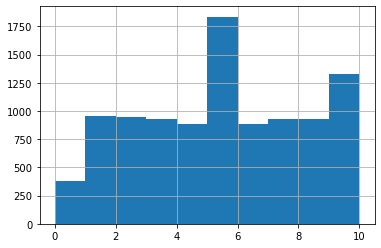

In [292]:
data['Tenure'].hist()

After replacing the missing values distribution characteristics did not  change significantly

In [293]:
#Do we have any duplicates?
data.duplicated().sum()

0

In [294]:
#How many customers among them have left? 0 - customer stayed, 1 - customer left.
data['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

<AxesSubplot:>

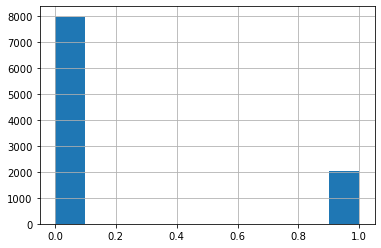

In [295]:
data['Exited'].hist()

It is evident that our data is imbalanced. The number of customers who stayed is significantly higher than those who churned, which is expected. This fact should be taken into account when further training the model.

In [296]:
#How many clients are male and female?
data['Gender'].value_counts()

Male      5457
Female    4543
Name: Gender, dtype: int64

In [297]:
#Which countries are represented among the clients?
data['Geography'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [298]:
#Let's remove the columns that we won't need in the future. These features do not have an impact on the target variable.
data=data.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)

In [299]:
print(data.dtypes)

CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure             float64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object


The columns Surname, Geography, and Gender contain categorical data. We will convert these categorical features into numerical using the One-Hot Encoding (OHE) technique to avoid the dummy variable trap.


In [300]:
data_ohe=pd.get_dummies(data, drop_first=True)

In [301]:
target=data_ohe['Exited']
features=data_ohe.drop(['Exited'], axis=1)


We will split the data into training, validation, and test sets in a ratio of 3:1:1. The training set will contain 60% of the data, the validation set will contain 20%, and the test set will contain 20%.

Split the data into training and validation sets

Let's assign the value of the random state to a constant variable.

In [302]:
RANDOM_STATE = 12345

In [303]:
features_train, features_valid, target_train, target_valid=train_test_split(features, target, test_size=0.4, random_state=RANDOM_STATE, stratify=target)

 Split the validation set further into validation and testing sets

In [304]:
features_valid, features_test, target_valid, target_test=train_test_split (features_valid, target_valid, test_size=0.5, random_state=RANDOM_STATE, stratify=target_valid)

In [305]:
print(features_train.shape)
print(features_valid.shape)
print(features_test.shape)

(6000, 11)
(2000, 11)
(2000, 11)


Let's scale the numerical features to the same scale, ecept for binary features to maintain their original values and interpretation.

In [306]:
numeric=['CreditScore','Age', 'Tenure','Balance','NumOfProducts', 'EstimatedSalary']

In [307]:
pd.options.mode.chained_assignment = None
scaler = StandardScaler()
scaler.fit(features_train[numeric])
features_train[numeric]=scaler.transform(features_train[numeric])
features_valid[numeric]=scaler.transform(features_valid[numeric])
features_test[numeric]=scaler.transform(features_test[numeric])

print(features_train.shape)
print(features_valid.shape)
print(features_test.shape)

(6000, 11)
(2000, 11)
(2000, 11)


## Research of the task

Our target feature is categorical with two categories: 1 (customer churned) and 0 (customer stayed). This means we are dealing with a binary classification problem, and three suitable models for this task are DecisionTreeClassifier, RandomForestClassifier, and LogisticRegression. To calculate the class frequencies, we can use the value_counts function. 

In [308]:
results = pd.DataFrame(columns=['Model', 'Balancing Method', 'Hyperparameters', 'F1 Score', 'ROC-AUC'])

def add_result(model, balancing_method, hyperparameters, f1_score, roc_auc):
    global results
    model_name = type(model).__name__
    hyperparams = model.get_params()
    result = pd.DataFrame([[model_name, balancing_method, hyperparameters, f1_score, roc_auc]],
                          columns=['Model', 'Balancing Method', 'Hyperparameters', 'F1 Score', 'ROC-AUC'])
    results = pd.concat([results, result], ignore_index=True)
results.head()

,Model,Balancing Method,Hyperparameters,F1 Score,ROC-AUC


In [309]:
hyperparameters = {}
if 'max_depth' in model.get_params():
    hyperparameters['max_depth'] = model.get_params()['max_depth']
if 'n_estimators' in model.get_params():
    hyperparameters['n_estimators'] = model.get_params()['n_estimators']

### DecisionTreeClassifier

Accuracy= 0.793
F1 score= 0.5035971223021583
Confusion matrix:
[[1376  216]
 [ 198  210]]
Class frequency:
0    0.787
1    0.213
dtype: float64


<AxesSubplot:>

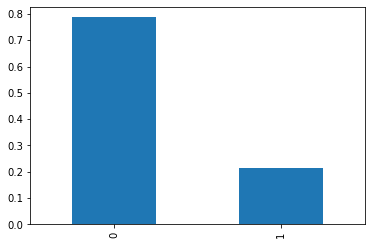

In [310]:
model=DecisionTreeClassifier(random_state=RANDOM_STATE)
model.fit(features_train, target_train)
predicted_valid=pd.Series(model.predict(features_valid))
accuracy_valid=accuracy_score(predicted_valid, target_valid)
class_frequency=predicted_valid.value_counts(normalize=True)

print('Accuracy=',accuracy_valid)
print('F1 score=',f1_score(predicted_valid, target_valid) )
print('Confusion matrix:')
print(confusion_matrix(target_valid, predicted_valid))
print('Class frequency:')
print(class_frequency)
class_frequency.plot(kind='bar')

Let's explore the model with different hyperparameters

In [311]:
for depth in range (1,15):
    model=DecisionTreeClassifier(random_state=RANDOM_STATE, max_depth=depth)
    model.fit(features_train, target_train)
    predictions_valid=model.predict(features_valid)
    print ('max_depth=', depth, ':', end='')
    print('F1 score=',round(f1_score(target_valid, predictions_valid),2))

max_depth= 1 :F1 score= 0.0
max_depth= 2 :F1 score= 0.52
max_depth= 3 :F1 score= 0.54
max_depth= 4 :F1 score= 0.52
max_depth= 5 :F1 score= 0.55
max_depth= 6 :F1 score= 0.58
max_depth= 7 :F1 score= 0.59
max_depth= 8 :F1 score= 0.56
max_depth= 9 :F1 score= 0.55
max_depth= 10 :F1 score= 0.54
max_depth= 11 :F1 score= 0.54
max_depth= 12 :F1 score= 0.55
max_depth= 13 :F1 score= 0.54
max_depth= 14 :F1 score= 0.5


The highest F1 score and accuracy are observed when the tree depth is 9 (F1=0.56).

In [312]:
model=DecisionTreeClassifier(random_state=RANDOM_STATE, max_depth=9)
model.fit(features_train, target_train)
predictions_valid=model.predict(features_valid)
probabilities_valid=model.predict_proba(features_valid)
probabilities_one_valid=probabilities_valid[:,1]
fpr, tpr, thresholds=roc_curve(target_valid, probabilities_one_valid)
auc_roc=roc_auc_score(target_valid, probabilities_one_valid)
f1=round(f1_score(target_valid, predictions_valid),2)
print('F1 score=',round(f1_score(target_valid, predictions_valid),2), 'AUC_ROC=', auc_roc)

F1 score= 0.55 AUC_ROC= 0.7977656357769239


after hyperparameter tuning and before addressing the class imbalance, the DecisionTreeClassifier model achieves an F1 score of 0.56 and an AUC-ROC score of 0.78.

In [313]:
hyperparameters = {}
if 'max_depth' in model.get_params():
    hyperparameters['max_depth'] = model.get_params()['max_depth']
if 'n_estimators' in model.get_params():
    hyperparameters['n_estimators'] = model.get_params()['n_estimators']

In [314]:
add_result(model, 'None', hyperparameters=hyperparameters, f1_score=f1, roc_auc=auc_roc)

### RandomForestClassifier

Accuracy= 0.793
F1 score= 0.6126656848306332
Confusion matrix:
[[1529   63]
 [ 200  208]]
Class frequency:
0    0.8645
1    0.1355
dtype: float64


<AxesSubplot:>

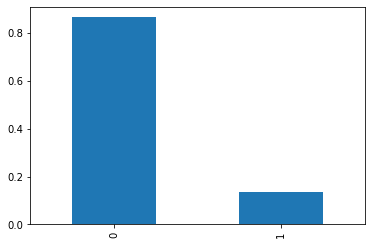

In [315]:
model=RandomForestClassifier(random_state=12345)
model.fit(features_train, target_train)
predicted_valid=pd.Series(model.predict(features_valid))
class_frequency=predicted_valid.value_counts(normalize=True)
print('Accuracy=',accuracy_valid)
print('F1 score=',f1_score(predicted_valid, target_valid) )
print('Confusion matrix:')
print(confusion_matrix(target_valid, predicted_valid))
print('Class frequency:')
print(class_frequency)
class_frequency.plot(kind='bar')

Let's explore the model with different hyperparameters.

In [316]:
best_model=None
best_result=0
for est in range(1,50,10):
    model=RandomForestClassifier (random_state=RANDOM_STATE, n_estimators=est)
    model.fit(features_train, target_train)
    predictions_valid=model.predict(features_valid)
    result=f1_score(predictions_valid, target_valid)
    if result>best_result:
        best_model=model
        best_result=result
    print('The F1 score of the best model on the validation dataset:', best_result)    

The F1 score of the best model on the validation dataset: 0.4999999999999999
The F1 score of the best model on the validation dataset: 0.5865921787709497
The F1 score of the best model on the validation dataset: 0.6078147612156295
The F1 score of the best model on the validation dataset: 0.6078147612156295
The F1 score of the best model on the validation dataset: 0.6078147612156295


The highest F1 score is achieved when the number of trees is 30.

In [317]:
model=RandomForestClassifier(random_state=RANDOM_STATE, n_estimators=30)
model.fit(features_train, target_train)
predictions_valid=model.predict(features_valid)
probabilities_valid=model.predict_proba(features_valid)
probabilities_one_valid=probabilities_valid[:,1]
fpr, tpr, thresholds=roc_curve(target_valid, probabilities_one_valid)
auc_roc=roc_auc_score(target_valid, probabilities_one_valid)
f1=round(f1_score(target_valid, predictions_valid),2)
print('F1 score=',round(f1_score(target_valid, predictions_valid),2), 'AUC_ROC=', auc_roc)

F1 score= 0.61 AUC_ROC= 0.8526109407330771


After hyperparameter tuning and before addressing the class imbalance, the RandomForestClassifier model achieves an F1 score of 0.57 and an AUC-ROC score of 0.83.

In [318]:
hyperparameters = {}
if 'max_depth' in model.get_params():
    hyperparameters['max_depth'] = best_model.get_params()['max_depth']
if 'n_estimators' in model.get_params():
    hyperparameters['n_estimators'] = best_model.get_params()['n_estimators']

In [319]:
add_result(model, 'None', hyperparameters=hyperparameters, f1_score=f1, roc_auc=auc_roc)

### LogisticRegression

Accuracy= 0.811
F1 score= 0.3076923076923077
Confusion matrix:
[[1538   54]
 [ 324   84]]
Class frequency:
0    0.931
1    0.069
dtype: float64


<AxesSubplot:>

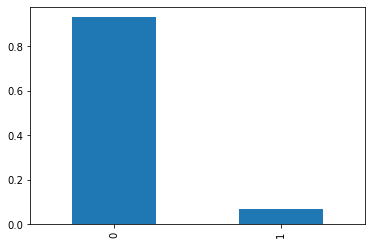

In [320]:
model=LogisticRegression(solver='liblinear', random_state=12345)
model.fit(features_train, target_train)
predicted_valid=pd.Series(model.predict(features_valid))
accuracy_valid=accuracy_score(predicted_valid, target_valid)
class_frequency=predicted_valid.value_counts(normalize=True)

print('Accuracy=',accuracy_valid)
print('F1 score=',f1_score(predicted_valid, target_valid) )
print('Confusion matrix:')
print(confusion_matrix(target_valid, predicted_valid))
print('Class frequency:')
print(class_frequency)
class_frequency.plot(kind='bar')

In [321]:
model=LogisticRegression(solver='liblinear', random_state=12345)
model.fit(features_train, target_train)
predictions_valid=model.predict(features_valid)
probabilities_valid=model.predict_proba(features_valid)
probabilities_one_valid=probabilities_valid[:,1]
fpr, tpr, thresholds=roc_curve(target_valid, probabilities_one_valid)
auc_roc=roc_auc_score(target_valid, probabilities_one_valid)
print('F1 score=',round(f1_score(target_valid, predictions_valid),2), 'AUC_ROC=', auc_roc)

F1 score= 0.31 AUC_ROC= 0.7875052345058627


In [322]:
hyperparameters = {}
if 'max_depth' in model.get_params():
    hyperparameters['max_depth'] = model.get_params()['max_depth']
if 'n_estimators' in model.get_params():
    hyperparameters['n_estimators'] = model.get_params()['n_estimators']

In [323]:
add_result(model, 'None', hyperparameters=hyperparameters, f1_score=f1, roc_auc=auc_roc)

The best result in terms of F1 score and AUC-ROC before addressing the class imbalance is obtained by the RandomForestClassifier model.

We can observe class imbalance on the graphs, which is logical since the number of churned customers is smaller compared to the number of customers who stayed. Let's work on addressing the class imbalance to improve our metrics.

## Tactics to Combat Imbalanced Training Data

We will address the class imbalance using methods such as class weighting in logistic regression, upsampling, downsampling, and adjusting the classification threshold.

### DecisionTreeClassifier Upsampling

1    0.50569
0    0.49431
dtype: float64
F1 score= 0.53 AUC_ROC= 0.701639324071337


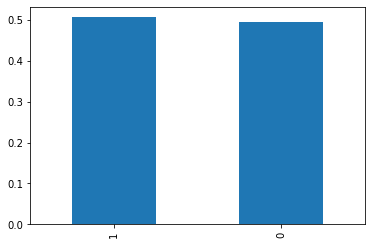

In [324]:
def upsample (features, target, repeat):
    features_zeros=features[target==0]
    features_ones=features[target==1]
    target_zeros=target[target==0]
    target_ones=target[target==1]
    
    features_upsampled=pd.concat([features_zeros]+[features_ones]*repeat)
    target_upsampled=pd.concat([target_zeros]+[target_ones]*repeat)
    
    features_upsampled, target_upsampled=shuffle(features_upsampled, target_upsampled, random_state=12345)
    
    return features_upsampled, target_upsampled

features_upsampled, target_upsampled = upsample(features_train, target_train, 4)

model=DecisionTreeClassifier(random_state=12345)
model.fit(features_upsampled, target_upsampled)

predicted_upsampled=pd.Series(model.predict(features_upsampled))
class_frequency_upsampled=predicted_upsampled.value_counts(normalize=True)
print(class_frequency_upsampled)
class_frequency_upsampled.plot(kind='bar')

probabilities_valid=model.predict_proba(features_valid)
probabilities_one_valid=probabilities_valid[:,1]
fpr, tpr, thresholds=roc_curve(target_valid, probabilities_one_valid)

auc_roc=roc_auc_score(target_valid, probabilities_one_valid)
predicted_valid=model.predict(features_valid)
print('F1 score=',round(f1_score(target_valid, predicted_valid),2), 'AUC_ROC=', auc_roc)



In [325]:
for depth in range (1,15):
    model=DecisionTreeClassifier(random_state=12345, max_depth=depth)
    model.fit(features_upsampled, target_upsampled)
    predictions_valid=model.predict(features_valid)
    print ('max_depth=', depth, ':', end='')
    print('F1 score=',round(f1_score(target_valid, predictions_valid),2))

max_depth= 1 :F1 score= 0.48
max_depth= 2 :F1 score= 0.5
max_depth= 3 :F1 score= 0.5
max_depth= 4 :F1 score= 0.56
max_depth= 5 :F1 score= 0.55
max_depth= 6 :F1 score= 0.58
max_depth= 7 :F1 score= 0.57
max_depth= 8 :F1 score= 0.55
max_depth= 9 :F1 score= 0.54
max_depth= 10 :F1 score= 0.54
max_depth= 11 :F1 score= 0.53
max_depth= 12 :F1 score= 0.51
max_depth= 13 :F1 score= 0.52
max_depth= 14 :F1 score= 0.53


In [326]:
model=DecisionTreeClassifier(random_state=12345, max_depth=6)
model.fit(features_upsampled, target_upsampled)
predictions_valid=model.predict(features_valid)
print('F1 score=',round(f1_score(target_valid, predictions_valid),2))

F1 score= 0.58


In [327]:
hyperparameters = {}
if 'max_depth' in model.get_params():
    hyperparameters['max_depth'] = model.get_params()['max_depth']
if 'n_estimators' in model.get_params():
    hyperparameters['n_estimators'] = model.get_params()['n_estimators']

In [328]:
add_result(model, 'Upsampled', hyperparameters=hyperparameters, f1_score=f1, roc_auc=auc_roc)

### DecisionTreeClassifier Downsampling

1    0.505795
0    0.494205
dtype: float64
F1 score= 0.53 AUC_ROC= 0.7048600847374126


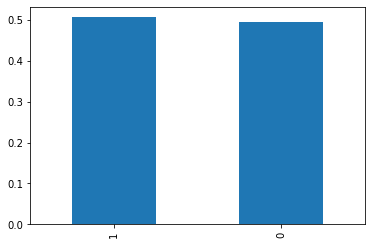

In [329]:
def downsample (features, target, fraction):
    features_zeros=features[target==0]
    features_ones=features[target==1]
    target_zeros=target[target==0]
    target_ones=target[target==1]
    
    features_downsampled=pd.concat([features_zeros.sample(frac=fraction, random_state=12345)]+[features_ones])
    target_downsampled=pd.concat([target_zeros.sample(frac=fraction, random_state=12345)]+[target_ones])
    
    features_downsampled, target_downsampled=shuffle(features_downsampled, target_downsampled, random_state=12345)
    
    return features_downsampled, target_downsampled

features_downsampled, target_downsampled = downsample(features_train, target_train, 0.25)


model=DecisionTreeClassifier(random_state=12345, max_depth=30)
model.fit(features_downsampled, target_downsampled)
predicted_downsampled=pd.Series(model.predict(features_downsampled))
class_frequency=predicted_downsampled.value_counts(normalize=True)
print(class_frequency)
class_frequency.plot(kind='bar')

probabilities_valid=model.predict_proba(features_valid)
probabilities_one_valid=probabilities_valid[:,1]
fpr, tpr, thresholds=roc_curve(target_valid, probabilities_one_valid)
auc_roc=roc_auc_score(target_valid, probabilities_one_valid)
predictions_valid=model.predict(features_valid)
print('F1 score=',round(f1_score(target_valid, predicted_valid),2), 'AUC_ROC=', auc_roc)




In [330]:
for depth in range (1,15):
    model=DecisionTreeClassifier(random_state=12345, max_depth=depth)
    model.fit(features_downsampled, target_downsampled)
    predictions_valid=model.predict(features_valid)
    print ('max_depth=', depth, ':', end='')
    print('F1 score=',round(f1_score(target_valid, predictions_valid),2))

max_depth= 1 :F1 score= 0.48
max_depth= 2 :F1 score= 0.5
max_depth= 3 :F1 score= 0.5
max_depth= 4 :F1 score= 0.56
max_depth= 5 :F1 score= 0.56
max_depth= 6 :F1 score= 0.59
max_depth= 7 :F1 score= 0.58
max_depth= 8 :F1 score= 0.57
max_depth= 9 :F1 score= 0.58
max_depth= 10 :F1 score= 0.57
max_depth= 11 :F1 score= 0.54
max_depth= 12 :F1 score= 0.54
max_depth= 13 :F1 score= 0.53
max_depth= 14 :F1 score= 0.52


In [331]:
model=DecisionTreeClassifier(random_state=12345, max_depth=5)
model.fit(features_downsampled, target_downsampled)
predictions_valid=model.predict(features_valid)
f1=round(f1_score(target_valid, predictions_valid),2)
print('F1 score=',round(f1_score(target_valid, predictions_valid),2))

F1 score= 0.56


In [332]:
hyperparameters = {}
if 'max_depth' in model.get_params():
    hyperparameters['max_depth'] = model.get_params()['max_depth']
if 'n_estimators' in model.get_params():
    hyperparameters['n_estimators'] = model.get_params()['n_estimators']

In [333]:
add_result(model, 'Downsampled', hyperparameters=hyperparameters, f1_score=f1, roc_auc=auc_roc)

### RandomForestClassifier Upsampling

In [334]:

model=RandomForestClassifier(random_state=12345, n_estimators=20)
model.fit(features_upsampled, target_upsampled)
predicted_valid=model.predict(features_valid)

probabilities_valid=model.predict_proba(features_valid)
probabilities_one_valid=probabilities_valid[:,1]
fpr, tpr, thresholds=roc_curve(target_valid, probabilities_one_valid)
auc_roc=roc_auc_score(target_valid, probabilities_one_valid)
print('F1 score=',round(f1_score(target_valid, predicted_valid),2), 'AUC_ROC=', auc_roc)



F1 score= 0.62 AUC_ROC= 0.8520813319046212


Let's try to find the best parameters for the balanced model

In [335]:
best_model=None
best_result=0
for est in range(1,60,10):
    model=RandomForestClassifier (random_state=12345, n_estimators=est)
    model.fit(features_upsampled, target_upsampled)
    predictions_valid=model.predict(features_valid)
    result=f1_score(predictions_valid, target_valid)
    if result>best_result:
        best_model=model
        best_result=result
    print('The F1 score of the best model on the validation dataset:', best_result)    

The F1 score of the best model on the validation dataset: 0.5085106382978722
The F1 score of the best model on the validation dataset: 0.6218274111675127
The F1 score of the best model on the validation dataset: 0.6218274111675127
The F1 score of the best model on the validation dataset: 0.6292428198433421
The F1 score of the best model on the validation dataset: 0.6292428198433421
The F1 score of the best model on the validation dataset: 0.6292428198433421


In [336]:
hyperparameters = {}
if 'max_depth' in model.get_params():
    hyperparameters['max_depth'] = best_model.get_params()['max_depth']
if 'n_estimators' in model.get_params():
    hyperparameters['n_estimators'] = best_model.get_params()['n_estimators']

In [337]:
add_result(model, 'Upsampled', hyperparameters=hyperparameters, f1_score=best_result, roc_auc=auc_roc)

### RandomForestClassifier Downsampling

In [338]:

model=RandomForestClassifier(random_state=12345, n_estimators=20)
model.fit(features_downsampled, target_downsampled)
predicted_valid=model.predict(features_valid)

probabilities_valid=model.predict_proba(features_valid)
probabilities_one_valid=probabilities_valid[:,1]
fpr, tpr, thresholds=roc_curve(target_valid, probabilities_one_valid)
auc_roc=roc_auc_score(target_valid, probabilities_one_valid)
print('F1 score=',round(f1_score(target_valid, predicted_valid),2), 'AUC_ROC=', auc_roc)




F1 score= 0.6 AUC_ROC= 0.8459315572962853


In [339]:
best_model=None
best_result=0
for est in range(1,60,10):
    model=RandomForestClassifier (random_state=12345, n_estimators=est)
    model.fit(features_downsampled, target_downsampled)
    predictions_valid=model.predict(features_valid)
    result=f1_score(predictions_valid, target_valid)
    if result>best_result:
        best_model=model
        best_result=result
    print('The F1 score of the best model on the validation dataset:', best_result)    

The F1 score of the best model on the validation dataset: 0.4739413680781759
The F1 score of the best model on the validation dataset: 0.567219152854512
The F1 score of the best model on the validation dataset: 0.5926622765757291
The F1 score of the best model on the validation dataset: 0.5926622765757291
The F1 score of the best model on the validation dataset: 0.5949485500467726
The F1 score of the best model on the validation dataset: 0.5949485500467726


In [340]:
hyperparameters = {}
if 'max_depth' in model.get_params():
    hyperparameters['max_depth'] = best_model.get_params()['max_depth']
if 'n_estimators' in model.get_params():
    hyperparameters['n_estimators'] = best_model.get_params()['n_estimators']

In [341]:
add_result(model, 'Downsampled', hyperparameters=hyperparameters, f1_score=best_result, roc_auc=auc_roc)

### LogisticRegression Upsampling

In [342]:


model=LogisticRegression(solver='liblinear', random_state=12345, class_weight='balanced')
model.fit(features_upsampled, target_upsampled)
predicted_valid=model.predict(features_valid)
probabilities_valid=model.predict_proba(features_valid)
probabilities_one_valid=probabilities_valid[:,1]
fpr, tpr, thresholds=roc_curve(target_valid, probabilities_one_valid)
auc_roc=roc_auc_score(target_valid, probabilities_one_valid)
f1=round(f1_score(target_valid, predicted_valid),2)
print('F1 score=',round(f1_score(target_valid, predicted_valid),2), 'AUC_ROC=', auc_roc)





F1 score= 0.53 AUC_ROC= 0.7936865701054292


In [343]:
hyperparameters = {}
if 'max_depth' in model.get_params():
    hyperparameters['max_depth'] = model.get_params()['max_depth']
if 'n_estimators' in model.get_params():
    hyperparameters['n_estimators'] = model.get_params()['n_estimators']

In [344]:
add_result(model, 'Upsampled', hyperparameters=hyperparameters, f1_score=f1, roc_auc=auc_roc)

### LogisticRegression Downsampling

In [345]:

model=LogisticRegression(solver='liblinear', random_state=12345, class_weight='balanced')
model.fit(features_downsampled, target_downsampled)
predicted_valid=model.predict(features_valid)

probabilities_valid=model.predict_proba(features_valid)
probabilities_one_valid=probabilities_valid[:,1]
fpr, tpr, thresholds=roc_curve(target_valid, probabilities_one_valid)
auc_roc=roc_auc_score(target_valid, probabilities_one_valid)
f1=round(f1_score(target_valid, predicted_valid),2)
print('F1 score=',round(f1_score(target_valid, predicted_valid),2), 'AUC_ROC=', auc_roc)



F1 score= 0.53 AUC_ROC= 0.7925626909055079


In [346]:
hyperparameters = {}
if 'max_depth' in model.get_params():
    hyperparameters['max_depth'] = model.get_params()['max_depth']
if 'n_estimators' in model.get_params():
    hyperparameters['n_estimators'] = model.get_params()['n_estimators']

In [347]:
add_result(model, 'Downsampled', hyperparameters=hyperparameters, f1_score=f1, roc_auc=auc_roc)

In [348]:
results.head(20)

,Model,Balancing Method,Hyperparameters,F1 Score,ROC-AUC
0,DecisionTreeClassifier,None,{'max_depth': 9},0.55,0.797766
1,RandomForestClassifier,None,"{'max_depth': None, 'n_estimators': 21}",0.61,0.852611
2,LogisticRegression,None,{},0.61,0.787505
3,DecisionTreeClassifier,Upsampled,{'max_depth': 6},0.61,0.701639
4,DecisionTreeClassifier,Downsampled,{'max_depth': 5},0.56,0.70486
5,RandomForestClassifier,Upsampled,"{'max_depth': None, 'n_estimators': 31}",0.629243,0.852081
6,RandomForestClassifier,Downsampled,"{'max_depth': None, 'n_estimators': 41}",0.594949,0.845932
7,LogisticRegression,Upsampled,{},0.53,0.793687
8,LogisticRegression,Downsampled,{},0.53,0.792563


The best result after balancing the classes is achieved by the RandomForestClassifier model with the consideration of upsampling (F1=0.629). 

## Model Testing

Let's perform the final testing

In [351]:
model=RandomForestClassifier(random_state=RANDOM_STATE, n_estimators=31)
model.fit(features_upsampled, target_upsampled)
predicted_test=model.predict(features_test)
accuracy_test=accuracy_score(predicted_test, target_test)
print('Accuracy=', f1_score(predicted_test, target_test))
print('F1=', f1_score(predicted_test, target_test))

Accuracy= 0.5552560646900269
F1= 0.5552560646900269


### ROC curve

0.8386977115790676


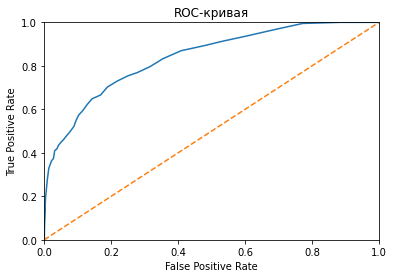

In [350]:
probabilities_test=model.predict_proba(features_test)
probabilities_one_test=probabilities_test[:,1]
fpr, tpr, thresholds=roc_curve(target_test, probabilities_one_test)
auc_roc=roc_auc_score(target_test, probabilities_one_test)
print(auc_roc)
plt.figure()
plt.plot(fpr,tpr)
plt.plot([0,1], [0,1], linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')
plt.show()

The quantitative interpretation of the ROC curve is given by the AUC (Area Under Curve) - the area bounded by the ROC curve and the false positive rate axis. The higher the AUC value, the better the classifier, with a value of 0.5 indicating the classifier performs no better than random guessing. A value less than 0.5 indicates the classifier performs inversely, i.e., it would perform better if positive and negative labels were swapped. In our case, the AUC value is 0.8, significantly higher than 0.5, indicating a reasonably high quality of our model.